<a href="https://colab.research.google.com/github/sayantikag98/Internship/blob/ML_INTERN/ML_final_29_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [17]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install adtk
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import SeasonalAD
from adtk.data import to_events
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os 
import tempfile
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import random
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import DBSCAN


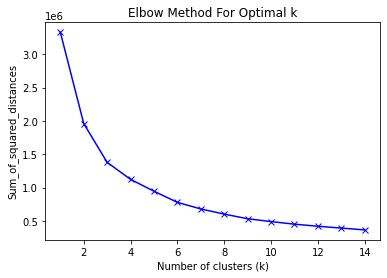

In [20]:
### Approx 100 machines and 1 day data

    
class AnomalyDetection:

  ### INITIATOR ###

  def __init__(self):
    # ! pip install pymongo
    # try:
      # import pymongo
      # from pymongo import MongoClient
      # import json
    # except Exception as e:
    #   print("Some modules are missing")
    pass
    


 ### LOAD DATA ###

  def loadData (self):
    copied_path="drive/My Drive/Data_final_version.csv"
    data=pd.read_csv(copied_path,parse_dates=["part_cycle_time"])
    #print(data.dtypes)
    return data

    ### CODE TO IMPORT DATA STORED IN MONGODB

  #def importData(self):
    ## To import the data from MongoDB server as pandas DataFrame
    # client = MongoClient()
    # db = client.DataIntern
    # collection = db.AnomalyDetect
    # data = pd.DataFrame(list(collection.find()))
    # return data

### TO MAKE SOME CHANGES IN SOME PARTICULAR COLUMNS ###

  # def columnManipulation(self,df):
  #   ## To correct the values of certain columns
  #   import numpy as np
  #   import itertools
  #   np.random.seed(1)
  #   totalItem=1000
  #   randomNum1=np.random.randint(60,1800,totalItem)
  #   randomList=list(randomNum1)
  #   # to generate 1000 evenly spaced numbers between 1 and 1000
  #   ranList1=np.linspace(1,totalItem,totalItem,dtype="int")
  #   ranList2=np.random.randint(1,200,totalItem)
  #   #print(ranList2)
  #   # to make the part_count and part_ID column 
  #   lis=[]
  #   lis1=[]
  #   for i in range(len(randomList)):
  #       lis.append(np.repeat(ranList1[i],randomList[i]))
  #       lis1.append(np.repeat(ranList2[i],randomList[i]))
  #   df['part_count']=list(itertools.chain.from_iterable(lis))
  #   df['part_ID']=list(itertools.chain.from_iterable(lis1))  
  #   return df

  
  ### TO IMPUTE USING KNN IMPUTER BUT DID NOT USE ###

  # def knnImpute(self,df,column):
  #   import numpy as np
  #   from sklearn.impute import KNNImputer
  #   x=df[column].values
  #   imputer= KNNImputer(n_neighbors=2)
  #   print("\n")
  #   print("The result after KNN Imputation")
  #   print(imputer.fit_transform(x.reshape(-1,1)))
  #   print("\n")


### FOR MAKING SOME CHANGES IN SOME OF THE COLUMNS IN THE DATA ###

  def dataManipulation(self):
    ## To remove the unneccessary columns and to store a copy of the dataframe
    ## To create only time and time_in_second column
    #print(data['_id'].nunique())
    data=self.loadData()
    df1=data
    df=data
    df['part_cycle_time']=df1['part_cycle_time'].dt.time
    data1=self.loadData()
    data2=self.loadData()
    data3=self.loadData()
 
    d=((data1['part_cycle_time'].dt.minute)*60)+data2['part_cycle_time'].dt.second
    df.insert(1, 'time_in_second', d)
    df.insert(2,'cumsum_in_minute',((df['time_in_second'].cumsum())/60).astype(int))
    df.insert(3,'cumsum_in_hour',((df['time_in_second'].cumsum())/3600).astype(int))
    df.insert(1,'time_in_minute',data2['part_cycle_time'].dt.minute)
    df.insert(0,'part_cycle_time_with_date',data3['part_cycle_time'])
    df['material'].replace({'MILD_STEEL':1},inplace=True)
    df['quality1']=df['quality']
    df.drop("quality",axis=1,inplace=True)
    df.rename(columns={"quality1":"quality"},inplace=True)
    df['running_tool_number'].fillna(0, inplace=True)
    df['tool_changed'].fillna(0,inplace=True)
    #self.knnImpute(df,'tolerance')
    df['tolerance'].fillna(df['tolerance'].mean(),inplace=True) 
    df['cutting_speed'].fillna(df['cutting_speed'].mean(),inplace=True)
    df['cutting_speed'].fillna(df['cutting_speed'].median(),inplace=True)
    # for i in range(len(l1)):
    #   comparison=l1[i]==l2[i]
    #   if (comparison == False):
    #     print(f"{l1[i]} and {l2[i]}")
    #     break
    return df


### FOR MAKING A NEW DATA AFTER DROPPING SOME OF THE COLUMNS ###

  def newData(self):
    df=self.dataManipulation()
    df_new=df
    df_new.drop(columns=['part_cycle_time','time_in_minute','time_in_second','cumsum_in_minute','part_ID','program_number'],inplace=True)
    df_new.drop(columns=['part_cycle_time_with_date','part_count','running_tool_number','tool_changed','material'],inplace=True)
    return df_new

  # def normalizedData(self):
  #   df=self.newData()
  #   d_var=df.drop(columns=['cumsum_in_hour','quality'])
  #   normalized_df=((d_var-d_var.min())/(d_var.max()-d_var.min()))
  #   return normalized_df

### TO NORMALIZE THE DATA USING MINMAX NORMALIZER FROM SKLEARN LIBRARY ###
## USE AS DEFAULT

  def normalizedData1(self):
    df=self.newData()
    #df.drop(columns=['cutting_speed'],inplace=True)
    minmax = MinMaxScaler()
    for x in df.columns:
      if (x!='cumsum_in_hour' and x!='quality'):
        df[x] = minmax.fit_transform(np.array(df[x]).reshape(-1,1))
    #df.style.background_gradient(cmap='Blues')
    #df.set_index('cumsum_in_hour',inplace=True)

    return df


  



### TO NORMALIZE THE DATA USING ROBUST SCALER FROM SKLEARN LIBRARY ###
### USE WHEN DATA HAS OUTLIERS

  def normalizedData2(self):
    df=self.newData()
    #df.drop(columns=['cutting_speed'],inplace=True)
    robustscaler=RobustScaler()
    for x in df.columns:
      if (x!='cumsum_in_hour' and x!='quality'):
        df[x] = robustscaler.fit_transform(np.array(df[x]).reshape(-1,1))
    #df.style.background_gradient(cmap='Blues')
    #df.set_index('cumsum_in_hour',inplace=True)
    return df




## cutting speed, depth of cut, diameter, and tolerance were removed as features
## as they had outliers greater than 45%
  def normalizedData(self):
    df=self.normalizedData2()
    df.set_index('cumsum_in_hour',inplace=True)
    df.drop(columns=['cutting_speed','depth_of_cut','diameter','tolerance','flow_rate','noise','spindle_speed'],inplace=True)
    return df

  def dataDivPart(self):
    df=self.normalizedData()
    #df.set_index('cumsum_in_hour',inplace=True)
    np.random.seed(1)
    totalItem=1000
    randomNum1=list(np.random.randint(60,1800,totalItem))
    #randomList=list(sum(randomNum1[0:x+1] for x in range (len(randomNum1))))
    randomList=[sum(randomNum1[0:x+1]) for x in range(0,len(randomNum1))]
    df_div=[]
    index=0
    for i,val in enumerate(randomList):
      df_div.append(df.iloc[index:val,:])
      index=val 
    return df_div



### this had the part_cycle_time column extra as compared to the previous method
  def dataDivPartNew(self):
    df=self.normalizedData()
    df1=self.loadData()
    df.insert(0,'part_cycle_time',df1['part_cycle_time'])
    np.random.seed(1)
    totalItem=1000
    randomNum1=list(np.random.randint(60,1800,totalItem))
    #randomList=list(sum(randomNum1[0:x+1] for x in range (len(randomNum1))))
    randomList=[sum(randomNum1[0:x+1]) for x in range(0,len(randomNum1))]
    df_div_new=[]
    index=0
    for i,val in enumerate(randomList):
      df_div_new.append(df.iloc[index:val,:])
      index=val 
    return df_div_new



  
    


### TO GET SOME INFORMATION ABOUT THE VARIOUS COLUMNS IN THE DATA ###

  def dataExploration(self):
    ## To get the information about the various columns in the dataframe
    df=self.dataDivPartNew()[0]
    # print(df.info())
    # print("\n")
    # print(df.describe())
    # print("\n")
    print(df.columns)
    # print("\n")
    # print(df.shape)
    # print("\n")
    # print(df.describe().shape)
    # print("\n")
    # #df['part_ID'].value_counts()
    # print(df.isnull().sum())
    # print("\n")
    return df


### TO MAKE THE LINEPLOT ###

  def lineplot(self,z):
    df=self.normalizedData()
    #df.set_index('cumsum_in_hour',inplace=True) 
    df.plot(subplots=True,linewidth=2.0,figsize=(30,30))
    plt.axis([0,z,0,1])
    plt.legend(loc="upper left")
    plt.figure()
    plt.show()
    print("\n")


  # def lineplot(self,a1,b1,c1,d1):
  #   import matplotlib.pyplot as plt
  #   import seaborn as sns
  #   df=self.dataManipulation()
  #   fig, axes = plt.subplots(3,1, figsize=(10,10),sharex=True)
  #   # plt.xlim(1,50000)
  #   # plt.ylim(1,100)
  #   for name, ax in zip([a1,b1,c1], axes):
  #     plt.plot(data=df, x=d1, y=name, ax=ax, linewidth=2.0)
  #     ax.set_title(name)
  #     plt.show()
  #   # Remove the automatic x-axis label from all but the bottom subplot
  #   if ax != axes[-1]:
  #       ax.set_xlabel('')
  #   print("\n")





  # def boxplot(self,a1,b1,c1,d1):
  #   import matplotlib.pyplot as plt
  #   import seaborn as sns
  #   df=self.dataManipulation()
  #   fig, axes = plt.subplots(3, 1, figsize=(100, 100), sharex=True)
  #   plt.xlim(1,50000)
  #   plt.ylim(1,100)
  #   for name, ax in zip([a1, b1, c1], axes):
  #     sns.boxplot(data=df, x=d1, y=name, ax=ax)
  #     ax.set_title(name)
  #   # Remove the automatic x-axis label from all but the bottom subplot
  #   if ax != axes[-1]:
  #       ax.set_xlabel('')
  #   print("\n")


### TO MAKE THE BOXPLOT ###

  def boxgraph(self):
    df=self.normalizedData()
    #df.boxplot(figsize=(15,15),grid=True,by='quality')
    df.boxplot(figsize=(15,15),grid=True)
    plt.show()



#### Observations from a box plot 
### Outliers are data points observed outside the whisker at a certain range   [Q1-1.5*IQR and Q3+1.5*IQR] IQR-> Inter-Quartile Range    (observed in spindle speed, noise, vibration_z and cutting speed)
### If the 50 percentile line is not in the middle then the data does not come from a symmetric distributrion
### 50 percentile line is closer to the Q1 line it is right-skewed as is oberved in many cases
### more the length more the inter-quartile range more is the spread of the distribution


  def countOutlier(self):
    df=self.normalizedData2()
    df.drop(columns=['quality','cumsum_in_hour'],inplace=True)
    pos=[]
    count=0
    for i in df.columns:
      x=df.loc[:,i]
      iqr=np.subtract(*np.percentile(x, [75, 25]))
      q1=np.percentile(x,25)
      q3=np.percentile(x,75)
      o1=q1-(1.5*iqr)
      o2=q3+(1.5*iqr)
      for j in range(939284):
        if ((x[j]<o1) | (x[j]>o2)):
          pos.append(True)   ## outliers would be assigned a value true
          count=count+1
        else:
          pos.append(False)
      print(f"The column {i} has {(count/939284)*100}% outlier")
    
   




### TO MAKE THE HISTOGRAM ###
  def histogram(self):
    df=self.normalizedData()
    plt.figure(figsize=(20,20))
    #df.set_index('cumsum_in_hour',inplace=True)
    df.hist(grid=True,bins=15,color='steelblue', edgecolor='black', linewidth=2.0,
           xlabelsize=10, ylabelsize=10)
    plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
    # plt.tick_params(axis='x',labelsize=10)
    # plt.tick_params(axis='y',labelsize=10)
    plt.show()


### TO GET THE PEARSON AND SPEARMAN RANK CORRELATION COEFFICIENT ###
  def correlationCoefficient(self):
    df=self.normalizedData()
    #df.set_index("cumsum_in_hour",inplace=True)
    corr=df.corr(method='pearson',min_periods=1)
    corr1=df.corr(method='spearman',min_periods=1)
    return corr,corr1


# Correlation Matrix Heatmap
  def correlationHeatMap(self):
    df=self.normalizedData()
    #df.set_index("cumsum_in_hour",inplace=True)
    f, ax = plt.subplots(figsize=(10, 6))
    corr = df.corr(method="pearson")
    sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                    linewidths=.05)
    f.subplots_adjust(top=0.93)
    f.suptitle('Pearson Correlation Heatmap', fontsize=14)


### TO GET THE HEAT MAP BUT COULD NOT USE IT AS IT COULD A LOT OF TIME ###

  def heatmap(self):
    df=self.normalizedData()
    #df.set_index("cumsum_in_hour",inplace=True)
    df.drop(columns=['quality'],inplace=True)
    sns.heatmap(df,annot=True,cmap='RdYlGn', linewidths=0.5)

### TO GET THE DISTRIBUTION PLOT BUT COULD NOT USE IT AS IT COULD A LOT OF TIME ###
  def distplot(self,x):
    df=self.newData()
    sns.distplot(df[x])
    #sns.kdeplot(df[x], shade=True, color='steelblue')
    

# Pair-wise Scatter Plots
  def pairwiseScatter(self):
    df=self.normalizedData()
    
    cols = ['spindle_load_%', 'current',
        'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
        'vibration_spindle']
    #f, ax = plt.subplots(figsize=(10, 6))
    sns.pairplot(df[cols], height=1.8, aspect=1.8,
                      plot_kws=dict(edgecolor="k", linewidth=0.5),
                      diag_kind="kde", diag_kws=dict(shade=True))

    
    # f.subplots_adjust(top=0.93, wspace=0.3)
    # f.suptitle('Pairwise Plots', fontsize=14)




# https://adtk.readthedocs.io/en/stable/quickstart.html
  def adtk(self,i):
    df=self.dataDivPartNew()
    df[i].drop(columns=['cumsum_in_hour','quality'],inplace=True)
    df[i].set_index("part_cycle_time",inplace=True)
    # series=validate_series(df[i])
    # plot(series)

    seasonal_ad = SeasonalAD()
    anomalies = seasonal_ad.fit_detect(df[i])
    plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")


############## k-means algorithm ##################################
###################################################################

# k-means is a widely used clustering algorithm. 
# It creates ‘k’ similar clusters of data points. 
# Data instances that fall outside of these groups 
# could potentially be marked as anomalies. 
# Before we start k-means clustering, 
# we use elbow method to determine the optimal number of clusters.
# Reference: https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46



# Now to find out the number of components (features) to keep
## is done using PCA
## Standard Scaler not used because the sns.distplot or the distribution plot did not show a normal distribution
  def pca(self):
    df=self.normalizedData()
    data = df[['spindle_load_%', 'current',
        'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
        'vibration_spindle']]
    X_std = data.values
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = np.cov(X_std.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key = lambda x: x[0], reverse= True)
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.show()



  def pca1(self):
    df=self.normalizedData1()
    # Take useful feature and standardize them
    data = df[['spindle_load_%', 'current',
        'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
        'vibration_spindle']]
    X = data.values
    #X_std = StandardScaler().fit_transform(X)
    # reduce to 2 important features
    pca = PCA(n_components=2)
    data_new = pca.fit_transform(X)
    # standardize these 2 new features
    # scaler = StandardScaler()
    # np_scaled = scaler.fit_transform(data)
    # df['quality'].fillna(1,inplace=True)
    # df['quality'].replace({'ACCEPTED':1,'REJECTED':0},inplace=True)
    l=[np.repeat(1,(939284-3700))]
    l.append(np.repeat(0,3700))
    l1=list(itertools.chain.from_iterable(l))
    np.random.seed(1)
    q=random.sample(l1,len(l1))
    pcaDataframe = pd.DataFrame(data_new,columns = ['principal_component_1', 'principal_component_2'])
    pcaData=pcaDataframe
    pcaDataframe['quality']=q
    #print(pcaDataframe)
##########################################################
    # fig = plt.figure(figsize = (15,15))
    # plt.scatter(data_new[:, 0], data_new[:, 1],
    #         c=pcaDataframe.quality, edgecolor='none', alpha=0.5,
    #         cmap=plt.cm.get_cmap('Blues', 10))
    # plt.axis([0,0.2,0,0.2])
    # plt.xlabel('component 1')
    # plt.ylabel('component 2')
    # plt.colorbar()
    # plt.show()
#############################################
    # fig = plt.figure(figsize = (15,15))
    # ax = fig.add_subplot(1,1,1) 
    # # Setting X-axis and Y-axis limits
    # ax.set_xlim([0.0, 0.05])
    # ax.set_ylim([0, 0.05])
    # ax.set_xlabel('Principal Component 1', fontsize = 15)
    # ax.set_ylabel('Principal Component 2', fontsize = 15)
    # ax.set_title('2 component PCA', fontsize = 20)
    # targets = [1, 0]
    # colors = ['r', 'b']
    # for target, color in zip(targets,colors):
    #   indicesToKeep = pcaDataframe['quality'] == target
    #   ax.scatter(pcaDataframe.loc[indicesToKeep, 'principal_component_1']
    #               , pcaDataframe.loc[indicesToKeep, 'principal_component_2']
    #               , c = color
    #               , s = 50)
    # ax.legend(targets)
    # ax.grid()
    # plt.show()
    return pcaData


### took a long time to run 

  def tsne(self):
    df=self.normalizedData()
    data = df[['spindle_load_%', 'current',
        'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
        'vibration_spindle']]
    X = data.values
    t_sne=TSNE(n_components=2)
    X_embedded = t_sne.fit_transform(X)
    X_embedded.shape
    tsneDataframe=pd.DataFrame(X_embedded,columns=['component_1','component_2'])
    print(tsneDataframe)
    plt.scatter(X_embedded[:0],X_embedded[:1])
    plt.show()
    return tsneDataframe




  # def elbowplot(self):
  #   df=self.normalizedData()
  #   data = df[['spindle_load_%', 'current', 
  #      'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
  #      'vibration_spindle', 'flow_rate', 
  #      'depth_of_cut', 'diameter', 'tolerance']].values
  #   n_cluster = range(1, 15)
  #   kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
  #   scores = [kmeans[i].score(data) for i in range(len(kmeans))]

  #   fig, ax = plt.subplots(figsize=(10,6))
  #   ax.plot(n_cluster, scores)
  #   plt.xlabel('Number of Clusters')
  #   plt.ylabel('Score')
  #   plt.title('Elbow Curve')
  #   plt.show()


### this is the elbow plot to determine the optimal number of clusters 
### to be considered 
### Here the sum of squared distances (inertia) is plotted against
### the number of clusters 
### the elbow point determines the optimal number of clusters
  def elbowplot1(self):
    df=self.normalizedData()
    data = df[['spindle_load_%', 'current',
        'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
        'vibration_spindle']].values
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
      km = KMeans(n_clusters=k)
      km = km.fit(data)
      Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()


## silhouette score vary between -1 to +1 so closer it is to 1 more better it is
## the peak value which is closer to one is the ideal cluster value
###### took a long time to run ##########################

  def silhouetteScore(self):
    df=self.normalizedData()
    data = df[['spindle_load_%', 'current',
        'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
        'vibration_spindle']].values
    sil = []
    kmax = 6
    K=range(2,kmax+1)
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(data)
      labels = kmeans.labels_
      sil.append(silhouette_score(data, labels, metric = 'euclidean'))
      print(sil)
      print("\n")
    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score method For Optimal k')
    plt.show()








    


## from the elbow plot 1 it can be seen that the plot levels off after 3 that is the elbow point is at 3 so here n_cluster=3
## n_cluster represent the number of clusters as well as the number of centroids generated
## here y_means will show which training example belong to which cluster

### As the ground truth or the actual labels were not available so the metrics used were those which did 
### not require ground truth labels

  def kmeans(self):
    # df=self.normalizedData()
    # X = df[['spindle_load_%', 'current',
    #     'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
    #     'vibration_spindle']].values
    pca=self.pca1()
    X=pca.values
    km = KMeans(n_clusters=3,random_state=0)
    km.fit(X)
    y_means=km.predict(X)
    labels = km.labels_
    print("The labels of each point")
    #print(labels)
    print("The value of y_means is \n")
    print(y_means)
    print("Sum of squared distances of samples to their closest cluster center is\n")
    print(km.inertia_)
    print("The value of the coordinates of the cluster center\n")
    print(km.cluster_centers_)
    print("The number of iterations run is\n")
    print(km.n_iter_)
    print(km.get_params)
    print(f"The shape of X is {X.shape}")
    # score_silhouette=metrics.silhouette_score(X, labels, metric='euclidean')
    # print(f"The silhouette score is {score_silhouette}")
    score_calinski=metrics.calinski_harabasz_score(X, labels)
    print(f"The Calinski-Harabasz Index is {score_calinski}")
    score_davies=metrics.davies_bouldin_score(X, labels)
    print(f"The Davies_Bouldin Index is {score_davies}")

    #Plotting
    # plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=100,  c='red', label ='Cluster 1')
    # plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=100, c='blue', label ='Cluster 2')
    # plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=100,  c='green', label ='Cluster 3')
    # plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
    # #plt.axis([0.125,0.175,0.25,0.75])
    # # #Axes3D.scatter(, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
    # # Axes3D.scatter(xs=X[y_means==0, 0], ys=X[y_means==0, 1], zs=0, zdir='z',s=100,  c='red', label ='Cluster 1')
    # # Axes3D.scatter(xs=X[y_means==1, 0], ys=X[y_means==1, 1], zs=0, zdir='z', s=100, c='blue', label ='Cluster 2')
    # # Axes3D.scatter(xs=X[y_means==2, 0], ys=X[y_means==2, 1], zs=0, zdir='z', s=100,  c='green', label ='Cluster 3')
    # # Axes3D.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], zs=0, zdir='z', s=300, c='yellow', label = 'Centroids')
    # plt.title('KMeans')
    # plt.show()





#### Mini-Batch K-Means clustering
########### took a long time to calculate the parameters ##################

  def miniBatchKmeans(self):
    # df=self.normalizedData()
    # X = df[['spindle_load_%', 'current',
    #     'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
    #     'vibration_spindle']].values
    pca=self.pca1()
    X=pca.values
    km = MiniBatchKMeans(n_clusters=3,random_state=0)
    km.fit(X)
    y_means=km.predict(X)
    labels = km.labels_
    #print("The labels of each point")
    #print(labels)
    print("The value of y_means is \n")
    print(y_means)
    print("Sum of squared distances of samples to their closest cluster center is\n")
    print(km.inertia_)
    print("The value of the coordinates of the cluster center\n")
    print(km.cluster_centers_)
    print("The number of iterations run is\n")
    print(km.n_iter_)
    print(km.get_params)
    score_silhouette=metrics.silhouette_score(X, labels, metric='euclidean')
    print(f"The silhouette score is {score_silhouette}")
    score_calinski=metrics.calinski_harabasz_score(X, labels)
    print(f"The Calinski-Harabasz Index is {score_calinski}")
    score_davies=metrics.davies_bouldin_score(X, labels)
    print(f"The Davies_Bouldin Index is {score_davies}")
    #Plotting
    # fig = plt.figure(1, figsize=(30,30))
    # ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    # ax.scatter(X.iloc[:,0], X.iloc[:,4], X.iloc[:,3],
    #           c=labels.astype(np.float), edgecolor="k")
    # plt.title("K Means", fontsize=14)
    #plt.scatter(X.iloc[:, 0], X.iloc[:, 3])
    #Plotting
    plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=100,  c='red', label ='Cluster 1')
    plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=100, c='blue', label ='Cluster 2')
    plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=100,  c='green', label ='Cluster 3')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
    #plt.axis([0.125,0.175,0.25,0.75])
    plt.title('KMeans')
    plt.show()



  def dbscan(self):
    pca=self.pca1()
    X=pca.values
    db_scan=DBSCAN(eps=3, min_samples=100000)
    labels=db_scan.fit_predict(X)
    print(labels)
    print(db_scan.get_params)
    score_silhouette=metrics.silhouette_score(X, labels, metric='euclidean')
    print(f"The silhouette score is {score_silhouette}")
    score_calinski=metrics.calinski_harabasz_score(X, labels)
    print(f"The Calinski-Harabasz Index is {score_calinski}")
    score_davies=metrics.davies_bouldin_score(X, labels)
    print(f"The Davies_Bouldin Index is {score_davies}")











# To get the count of the Accepted and Rejected parts
  def count(self):
    df=self.loadData()
    df['quality'].replace({"ACCEPTED":1,"REJECTED":0},inplace=True)
    df['quality'].dropna(inplace=True)
    #print(df['quality'].isnull().sum())
    neg, pos = np.bincount(df['quality'])
    total = neg + pos
    print('Examples:\n    Total: {}\n    Negative: {} ({:.2f}% of total)\n'.format(
        total, neg, 100 * neg / total))


# The whole dataframe was divided into train, test and validation set
# The validataion set is used during the model fitting to evaluate the loss and any metrics. 
# The test set is completely unused during the training phase and is only used at the end to evaluate 
# how well the model is performing on unseen data.
# This is especially important in case of imbalanced data where overfitting is a significant concern. 


  def trainTestSplit(self):
    df=self.dataDivPart()
    for i in range(len(df)):
      df[i]['quality'].replace({"ACCEPTED":1,"REJECTED":0},inplace=True)
      df[i]['quality'].dropna(inplace=True)
    
    train, test = train_test_split(df, test_size=0.2,random_state=0)
    train, val = train_test_split(train, test_size=0.2,random_state=0)
    print(type(train))

    # print(len(train), 'train examples')
    # print(len(val), 'validation examples')
    # print(len(test), 'test examples')
    return train,val,test
    



# Form np arrays of labels and features.
  def train_labels_features(self):
    train,val,test=self.trainTestSplit()
    train_labels_list=[]
    train_features_list=[]
    for i in range(len(train)):
      train_labels_list.append(train[i].loc[:,'quality'].values.tolist())
      train[i].drop(columns=['quality'],inplace=True)
      train_features_list.append(train[i].values)
    train_labels=[item for elem in train_labels_list for item in elem]
    train_labels=np.array(train_labels)
    train_f1=train_features_list[0:80]
    train_f2=train_features_list[80:160]
    train_f3=train_features_list[160:240]
    train_f4=train_features_list[240:320]
    train_f5=train_features_list[320:400]
    train_f6=train_features_list[400:480]
    train_f7=train_features_list[480:560]
    train_f8=train_features_list[560:]
    
    def func(train_features):
      import functools
      import operator
      output=[]
      for i in train_features:
        List_flat = functools.reduce(operator.iconcat, i,[])
        output.append(List_flat)
      return output
    
    output1=func(train_f1)
    output2=func(train_f2)
    output3=func(train_f3)
    output4=func(train_f4)
    output5=func(train_f5)
    output6=func(train_f6)
    output7=func(train_f7)
    output8=func(train_f8)   
    output=output1+output2+output3+output4+output5+output6+output7+output8
    train_features=np.array(output)
    print(train_features[0])
    return train_labels,train_features

     
  
    



  def val_labels_features(self):
    train,val,test=self.trainTestSplit()
    val_labels_list=[]
    val_features_list=[]
    val_list=[]
    len_val=[]
    for i in range(len(val)):
      val_labels_list.append(val[i].loc[:,'quality'].values.tolist())
      val[i].drop(columns=['quality'],inplace=True)
      for elem in val[i].values:
        for item in elem:
          val_list.append(item)

      val_features_list.append(val_list)
      len_val.append(len(val_features_list[i]))
    val_features=np.array(val_features_list)
    val_labels=[item for elem in val_labels_list for item in elem ]
    val_labels=np.array(val_labels)
    #print("\n The val labels are\n")
    #print(len(val_labels))
    # print("\n The val features are\n")
    # print(val_features)
    print(len(len_val))
    print("\n")
    print(len_val)
    
    return val_labels,val_features



  def test_labels_features(self):
    train,val,test=self.trainTestSplit()
    test_labels_list=[]
    test_features_list=[]
    test_list=[]
    len_test=[]
    for i in range(len(test)):
      test_labels_list.append(test[i].loc[:,'quality'].values.tolist())
      test[i].drop(columns=['quality'],inplace=True)
      for elem in test[i].values:
        for item in elem:
          test_list.append(item)

      test_features_list.append(test_list)
      len_test.append(len(test_features_list[i]))
    test_features=np.array(test_features_list)
    test_labels=[item for elem in test_labels_list for item in elem ]
    test_labels=np.array(test_labels)
    # print("\n The test labels are\n")
    # print(len(test_labels))
    # print("\n The test features are\n")
    # print(test_features)
    print(len(len_test))
    print("\n")
    print(len_test)
    
    return test_labels,test_features





  




#### MAIN FUNCTION ######

def main():
  a=AnomalyDetection()
  #print(a.loadData())
  # print("\n")
  #print(a.dataManipulation())
  # print("\n")
  #print(a.newData().shape)
  # print("The normalized data with MinMaxScaler\n")
  # print(a.normalizedData1())
  # print("The normalized data with RobustScaler\n")
  # print(a.normalizedData2())
  # print(a.dataDivPart())
  # print(a.dataDivPartNew())
  #a.dataExploration()
  # print("\n")
  



  #a.lineplot(4000)
  #print("\n")
  #a.lineplot('spindle_speed','cumsum_in_hour',1500)
  #a.boxgraph()
  #a.countOutlier()
  #print("\n")
  #a.histogram()
 
  # print("The pearson coefficient is:")
  # print(a.correlationCoefficient()[0])
  # print("\n")
  # print("The spearman coefficient is:")
  # print(a.correlationCoefficient()[1])
  # a.correlationHeatMap()
  #a.heatmap()
  # cols=['spindle_load_%', 'current', 'spindle_speed',
  #         'spindle_temp', 'feed', 'vibration_X', 'vibration_Z',
  #         'vibration_spindle', 'noise', 'flow_rate', 'cutting_speed',
  #         'depth_of_cut', 'diameter', 'tolerance']
  # for i in cols:  
  #   a.distplot(i)
  #   plt.show()
  # a.pairwiseScatter()
  #a.adtk(700)
  #a.pca()
  #a.pca1()
  #a.tsne()
  #a.elbowplot()
  a.elbowplot1()
  #a.silhouetteScore()
  #a.kmeans()
  # print("Mini Batch KMeans below\n")
  #a.miniBatchKmeans()
  #a.dbscan()
  #a.trainTestSplit()
  # print("\n")
  #a.count()
  #a.train_labels_features()
  #a.val_labels_features()
  #a.test_labels_features()


if __name__=="__main__":
  main()


In [ ]:
# class MongoDB(object):
#   def __init__(self, dBName=None, collectionName=None):
#     self.dBName=dBName
#     self.collectionName= collectionName
#     self.client=MongoClient("localhost", 27017)
#     self.DB=self.client[self.dBName]
#     self.collection=self.DB[self.collectionName]

#   def InsertData(self,path=None):

#     copied_path=("Data_final_version.csv")
#     df=pd.read_csv(copied_path)
#     data=df.to_dict('records')

#     self.collection.insert_many(data,ordered=False)
#     print("All the data has been exported to mongoDB server")

# if __name__=="__main__":
#   mongodb=MongoDB(dBName='DataIntern',collectionName='AnomalyDetect')
#   mongodb.InsertData(path="Data_final_version.csv")

In [8]:
# import functools
# import operator
# l=[[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]],[[19,20,21],[22,23,24],[25,26,27]]]   # list to be flattened

# output=[]
# for i in range(len(l)):
#   List_flat = functools.reduce(operator.iconcat, l[i],[])
#   output.append(List_flat)

# print("Original List:",l)
# print("Flattened List:",output)


Original List: [[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]], [[19, 20, 21], [22, 23, 24], [25, 26, 27]]]
Flattened List: [[1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24, 25, 26, 27]]


In [15]:
# import itertools
# l=[[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]],[[19,20,21],[22,23,24],[25,26,27]]]

# output=[]
# for i in range(len(l)):
#   List_flat = list(itertools.chain(*l[i]))
#   output.append(List_flat)


# print("Original List:",l)
# print("Flattened List:",output)


Original List: [[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]], [[19, 20, 21], [22, 23, 24], [25, 26, 27]]]
Flattened List: [[1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24, 25, 26, 27]]
